## Aula 07 - Regressão Linear

Até agora foram vistos alguns conceitos de classificação. Outro importante aspecto do aprendizado supervisionado são os modelos de aprendizagem para problemas de regressão. Nestes problemas, a saída esperada é contínua, em vez de valores discretos como na classificação.

Um conjunto de dados de propaganda é disponibilizado junto com esse notebook, onde cada linha indica um tipo de mercado diferente. Importe os dados para visualizar a estrutura deles:

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('ad.data', index_col=0)
display(data.head())

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
data.shape

(200, 4)

Quais são os atributos?
- **TV:** dólares gastos em propagandas veiculadas na TV para um produto em determinado mercado (em milhões)
- **Radio:** dólares gastos em propagandas veiculadas em rádio
- **Newspaper:** dólares gastos com propaganda em jornais

Qual o rótulo da amostra?
- **Sales:** vendas (em milhares) de um determinado item em um mercado específico

Para facilitar, os dados também poderiam ser visualizados para compreender melhor com a distribuição, e se há alguma tendência.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


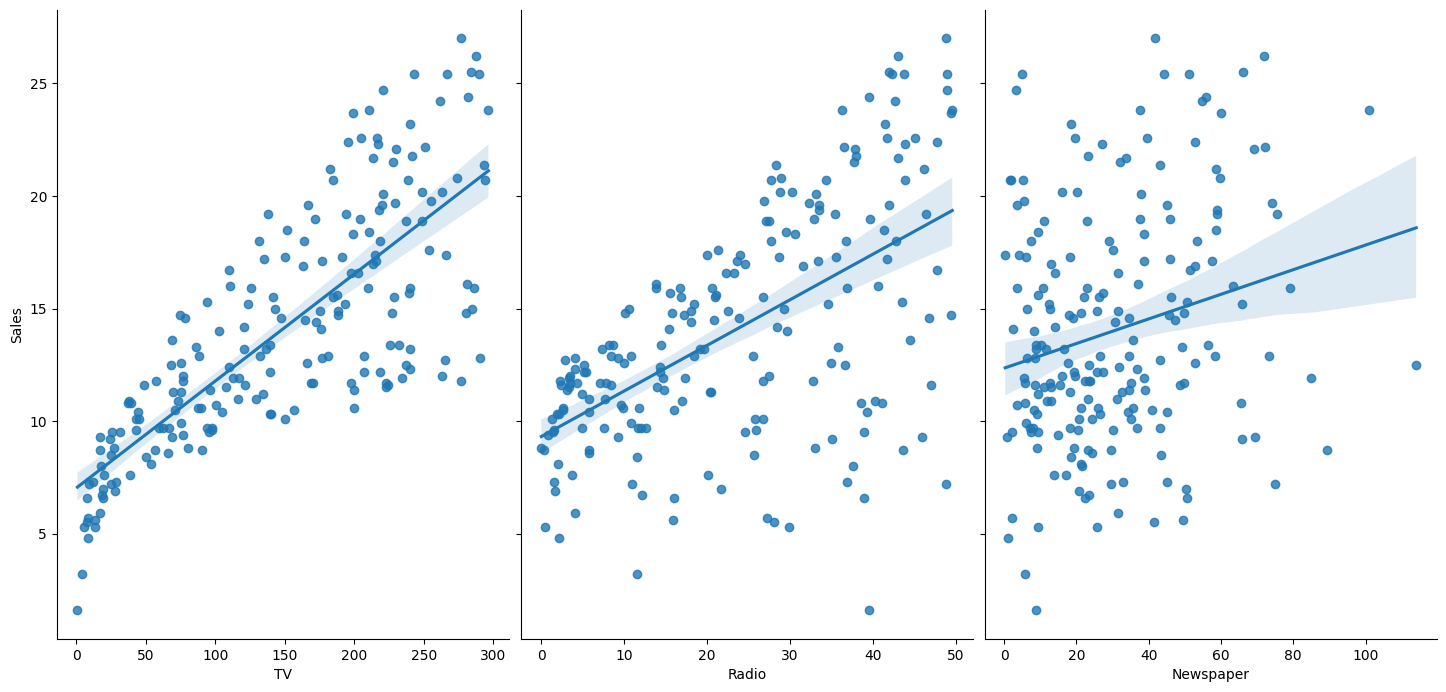

In [ ]:
import seaborn as sns
%matplotlib inline

sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

## Regressão Linear

Uma das formas de resolver um problema desse tipo é aplicando a regressão linear. Nesse método, procura-se uma função capaz de traçar uma linha de tendência que servirá para prever um valor futuro em determinadas condições. A vantagem é que é um modelo matematicamente simples de interpretar. A desvantagem é que dificilmente levará a uma acurácia satisfatória.

### Forma da regressão linear:

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ é a saída
- $\beta_0$ é um valor de bias (deslocamento)
- $\beta_1$ é o coeficiente de $x_1$ (do primeiro atributo)
- $\beta_n$ é o coeficiente de $x_n$ (do n-ésimo atributo)

Assim, para esse problema, tem-se:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Os valores $\beta$ são chamados de **coeficientes de modelo** e são ajustados na etapa de aprendizagem, a qual acontece com o ajuste do modelo utilizando o critério dos "quadrados mínimos". Uma vez aprendidos esses parâmetros, o modelo pode ser usado de forma preditiva!

### Separando os atributos da classe

In [ ]:
atributos = ['TV', 'Radio', 'Newspaper']

X = data[atributos]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [ ]:
y = data['Sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

Em seguida, é necessário dividir quais dados serão apresentados na etapa de treino e quais dados serão apresentados na etapa de teste:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 3)
(140,)
(60, 3)
(60,)


### Regressão linear no scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(modelo.intercept_)
print(modelo.coef_)

2.937215734690609
[0.04695205 0.17658644 0.00185115]


In [ ]:
list(zip(atributos, modelo.coef_)) # o comando zip junta dois vetores e forma tuplas

[('TV', 0.04695204776848465),
 ('Radio', 0.1765864352681737),
 ('Newspaper', 0.0018511533188922402)]

$$y = 2.93 + 0.0469 \times TV + 0.176 \times Radio + 0.002 \times Newspaper$$

Como interpretar **o coeficiente da variável TV** (0.0469)?

Quanto mais positivo o valor, maior o impacto, quanto menor o valor (inclusive negativo), maior a contribuição na outra direção. Quando os dados estão normalizados, então para uma dada quantia gasta com de Radio e Newspaper, **um adicional de $1.000 gastos com TV** reflete diretamente na **venda de 46.6 itens**, segundo esse modelo.

### Predição

In [ ]:
modelo.predict([[100,20,15]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.19191652])

No cenário dado, era esperado a venda de aproximadamente **11,2 milhões** de itens de produto.

### Avaliação de modelos de regressão

Métricas como acurácia são comuns em problemas de classificação, mas não se aplicam em problemas de regressão. No lugar desta, são utilizadas métricas específicas para valores contínuos.

In [ ]:
true = np.array([100, 50, 30, 20])
pred = np.array([90, 50, 50, 30])

**Mean Absolute Error** (MAE) é a média absoluta dos erros:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [ ]:
# calculando MAE com scikit
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0


**Mean Squared Error** (MSE) é a média do quadrado dos erros:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [ ]:
# calculando MSE com scikit
print(metrics.mean_squared_error(true, pred))

150.0


**Root Mean Squared Error** (RMSE) é a raiz quadrada da média do quadrado dos erros:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [ ]:
# calculando RMSE com scikit
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589


**Mean absolute percentage error** (MAPE) é a média do erro absoluto em percentual:

$$\displaystyle {\mbox{M}}={\frac {100\%}{n}}\sum _{t=1}^{n}\left|{\frac{y_i-\hat{y}_i}{y_i}}\right|$$

In [ ]:
# calculando MAPE com numpy -- pq não tem no scikit :(
print(np.mean(np.abs((true - pred) / true)) * 100)

31.666666666666664


A comparação entre as diferentes métricas:

- **MAE** é a mais fácil de entender, porque é uma média.
- **MSE** é mais popular que a MAE porque pune erros maiores.
- **RMSE** é ainda mais popular porque, além das características anteriores, é interpretável em termos da variável de saída.
- **MAPE** é interpretável em termos percentual, porém é necessário tomar cuidado com a divisão por zero

### Calculando RMSE para as predições de Vendas

In [ ]:
y_pred = modelo.predict(X_test)

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE:',np.mean(np.abs((y_test - y_pred) / y_test)) * 100)


RMSE: 1.388857410775697
MAPE: 8.545502795467279


### Validação Cruzada

In [ ]:
from sklearn.model_selection import KFold

X = data[atributos].values
y = data.Sales.values

kf = KFold(n_splits = 10, random_state = 42, shuffle=True)

scores = []

for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    #score = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    #score = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    score = modelo.score(X_test, y_test)
    scores.append(score)

scores = np.array(scores)

print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

R2: 0.87 (+/- 0.15)
[0.90469248 0.8946926  0.71976732 0.86420469 0.93868262 0.93194788
 0.92284837 0.8750849  0.93814699 0.74132062]


### Utilizando gradiente

(Referência: https://www.tensorflow.org/tutorials/keras/regression)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

#### Normalização

In [ ]:
# as variáveis já foram separadas: X_train, X_test, y_train, y_test

normalizer = preprocessing.Normalization()
normalizer.adapt(X_train)

#### Construção da regressão

In [ ]:
model = keras.Sequential([
    normalizer,
    layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 3)                 7         
 on)                                                             
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 11 (48.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 7 (32.00 Byte)
_________________________________________________________________


#### O modelo não treinado tem condições de dar respostas

In [ ]:
y_pred = model.predict(X_test)

print((y_pred.reshape(-1) - y_test).mean())

1/1 [==============================] - 0s 109ms/step
-13.633232680261134


In [ ]:
import matplotlib.pyplot as plt

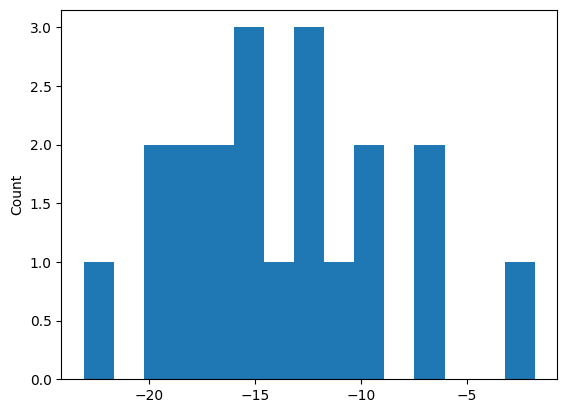

In [ ]:
error = y_pred.reshape(-1) - y_test
plt.hist(error, bins=15)
_ = plt.ylabel('Count')

#### Inserção de otimizador e função de custo

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_split = 0.2)

# verbose=0 não gera saida

Epoch 1/10
5/5 [==============================] - 1s 88ms/step - loss: 13.9418 - val_loss: 13.5144
Epoch 2/10
5/5 [==============================] - 0s 21ms/step - loss: 13.3966 - val_loss: 13.1446
Epoch 3/10
5/5 [==============================] - 0s 14ms/step - loss: 12.8575 - val_loss: 12.7588
Epoch 4/10
5/5 [==============================] - 0s 17ms/step - loss: 12.3287 - val_loss: 12.3490
Epoch 5/10
5/5 [==============================] - 0s 22ms/step - loss: 11.8117 - val_loss: 11.9503
Epoch 6/10
5/5 [==============================] - 0s 18ms/step - loss: 11.3106 - val_loss: 11.5195
Epoch 7/10
5/5 [==============================] - 0s 18ms/step - loss: 10.8126 - val_loss: 11.0412
Epoch 8/10
5/5 [==============================] - 0s 19ms/step - loss: 10.3448 - val_loss: 10.5565
Epoch 9/10
5/5 [==============================] - 0s 16ms/step - loss: 9.8844 - val_loss: 10.0647
Epoch 10/10
5/5 [==============================] - 0s 18ms/step - loss: 9.4166 - val_loss: 9.5141


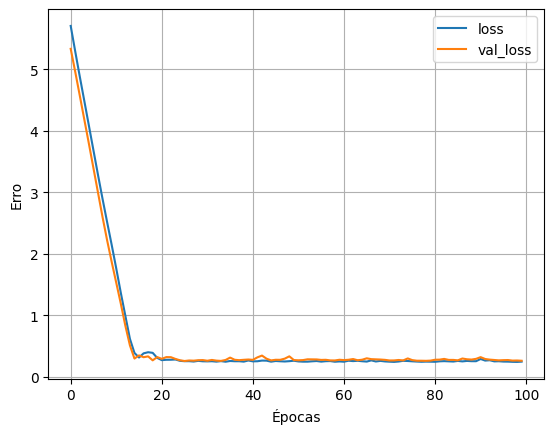

In [7]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    plt.grid(True)

plot_loss(history)

In [ ]:
y_pred = model.predict(X_test)

print((y_pred.reshape(-1) - y_test).mean())

1/1 [==============================] - 0s 69ms/step
-8.540611987113953


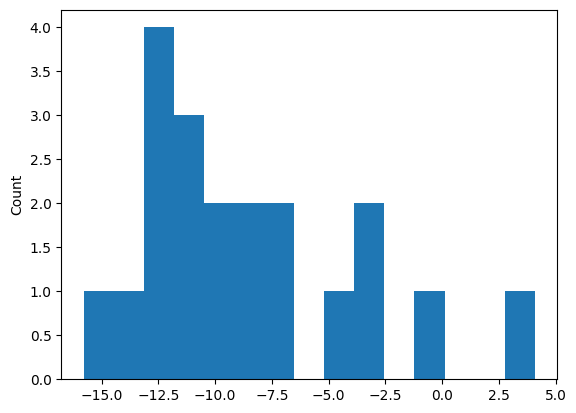

In [ ]:
error = y_pred.reshape(-1) - y_test
plt.hist(error, bins=15)
_ = plt.ylabel('Count')

#### Treinando por mais tempo

In [ ]:
# importante redefinir o modelo

model = keras.Sequential([
    normalizer,
    layers.Dense(1)
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')

history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_split = 0.2,
    verbose=0)

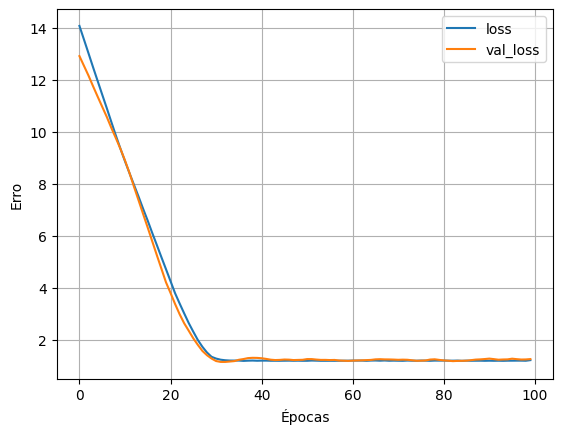

In [ ]:
plot_loss(history)

In [ ]:
y_pred = model.predict(X_test)

print((y_pred.reshape(-1) - y_test).mean())

1/1 [==============================] - 0s 127ms/step
0.9369175863265994


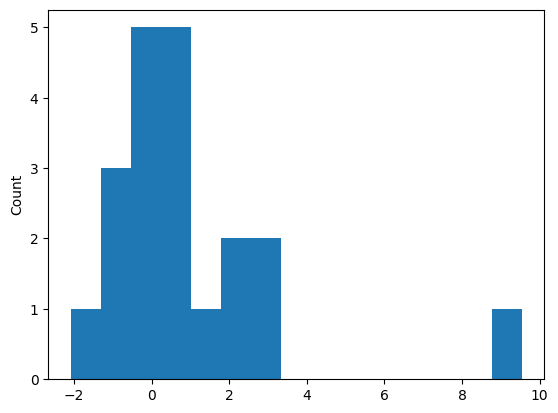

In [ ]:
error = y_pred.reshape(-1) - y_test
plt.hist(error, bins=15)
_ = plt.ylabel('Count')

## Exercicio

O objetivo deste exercício é criar um modelo de regressão linear que preveja o comprimento da sépala da flor Iris com base em outras características da flor, como largura da sépala, comprimento da pétala e largura da pétala.

Passos do Exercício:

Passo 1: Importe as bibliotecas necessárias.

Passo 2: Carregue o conjunto de dados Iris.

Passo 3: Crie um DataFrame pandas com os dados.

Passo 4: Selecione as características que você deseja usar para prever o comprimento da sépala (por exemplo, largura da sépala, comprimento da pétala, largura da pétala).

Passo 5: Divida os dados em um conjunto de treinamento e um conjunto de teste.

Passo 6: Crie um modelo de regressão linear.

Passo 7: Treine o modelo com os dados de treinamento.


Passo 8: Faça previsões usando o modelo treinado.


Passo 9: Avalie o desempenho do modelo calculando o erro médio quadrático (MSE) e o coeficiente de determinação (R^2).


Passo 10: Desafio extra: Visualize os resultados usando gráficos para mostrar as previsões em relação aos valores reais.

Epoch 1/16
4/4 [==============================] - 1s 132ms/step - loss: 5.6957 - val_loss: 5.5494
Epoch 2/16
4/4 [==============================] - 0s 36ms/step - loss: 5.2916 - val_loss: 5.1666
Epoch 3/16
4/4 [==============================] - 0s 37ms/step - loss: 4.9002 - val_loss: 4.7720
Epoch 4/16
4/4 [==============================] - 0s 48ms/step - loss: 4.4843 - val_loss: 4.3792
Epoch 5/16
4/4 [==============================] - 0s 47ms/step - loss: 4.0849 - val_loss: 3.9793
Epoch 6/16
4/4 [==============================] - 0s 36ms/step - loss: 3.6932 - val_loss: 3.6007
Epoch 7/16
4/4 [==============================] - 0s 39ms/step - loss: 3.3224 - val_loss: 3.2250
Epoch 8/16
4/4 [==============================] - 0s 36ms/step - loss: 2.9491 - val_loss: 2.8382
Epoch 9/16
4/4 [==============================] - 0s 39ms/step - loss: 2.5412 - val_loss: 2.4433
Epoch 10/16
4/4 [==============================] - 0s 37ms/step - loss: 2.1612 - val_loss: 2.0417
Epoch 11/16
4/4 [===========

2/2 [==============================] - 0s 4ms/step
MSE:  0.14441324699300057
R2:  0.7622271524832701


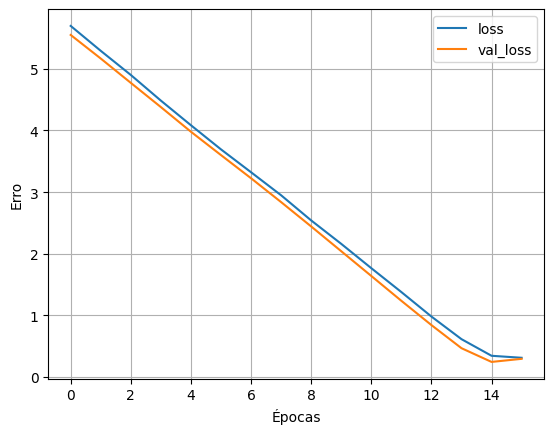

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Carregue os dados
data = pd.read_csv('iris.csv')

# Divida os dados em conjuntos de treinamento e teste
features = data.columns[1:-1]
label = 'comprimento_sepala'

X = data[features]
y = data[[label]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

# Escolha um modelo e treine-o
normalizer = preprocessing.Normalization()
normalizer.adapt(X_train)

model = keras.Sequential([
    normalizer,
    layers.Dense(1)
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')

# Faça previsões
history = model.fit(X_train, y_train,epochs=16, validation_data=(X_test, y_test))
plot_loss(history)

# Avalie o modelo
y_pred = model.predict(X_test)
print("MSE: " , mean_squared_error(y_test, y_pred))
print("R2: " , r2_score(y_test, y_pred))

# Visualize os resultados
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Valores Reais vs. Previsões')
plt.show()

Perguntas do Exercício:

1- Qual é o valor do Mean Squared Error (MSE) do modelo de regressão linear?

2- Qual é o valor do coeficiente de determinação (R^2) do modelo? O que isso indica sobre o ajuste do modelo aos dados?

3- Como você acha que o modelo de regressão linear se sairia se você usasse diferentes características para prever o comprimento da sépala?

4- Experimente ajustar o tamanho do conjunto de teste (alterando o test_size no Passo 5). Como isso afeta o desempenho do modelo?

**1- Qual é o valor do Mean Squared Error (MSE) do modelo de regressão linear?**
0.14

**2- Qual é o valor do coeficiente de determinação (R^2) do modelo? O que isso indica sobre o ajuste do modelo aos dados?**
0.76, isso indica que o seu modelo explica aproximadamente 76% da variação na variável dependente com base nas variáveis independentes utilizadas no modelo. Isso é um bom sinal e sugere um ajuste razoavelmente bom do modelo aos dados, pois a maior parte da variação está sendo capturada.

**3- Como você acha que o modelo de regressão linear se sairia se você usasse diferentes características para prever o comprimento da sépala?**
Se você escolher características que têm uma relação forte e linear com o comprimento da sépala, o modelo de regressão linear provavelmente se sairá bem e poderá fornecer boas previsões. Isso ocorre porque o modelo de regressão linear é especialmente adequado para capturar relacionamentos lineares entre variáveis. Se os dados realmente seguem um padrão linear, o modelo terá uma boa chance de ajustar-se bem.

A chave está em escolher cuidadosamente as características com base no conhecimento do domínio e realizar análises exploratórias de dados para entender a relação entre as variáveis antes de aplicar um modelo. Além disso, a validação cruzada e a avaliação de métricas de desempenho ajudarão a determinar a qualidade do modelo de regressão linear em relação às características escolhidas.

Portanto, o desempenho do modelo de regressão linear dependerá da qualidade das características selecionadas e da natureza da relação entre essas características e o comprimento da sépala.

**4- Experimente ajustar o tamanho do conjunto de teste (alterando o test_size no Passo 5). Como isso afeta o desempenho do modelo?**
Isso ira afetar na quantidade de elementos que tenho disponivel para teste, por ser um dataset pequeno, ter poucos elementos para teste como 20%, se torna poucas linhas para conseguir validar a qualidade do modelo, podendo transformar a metrica em não conclusiva.